In [1]:
#setting up custom markers and auto segmenting them thru Watershed

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
road = cv2.imread('road_image.jpg')

In [4]:
road_copy = road.copy()

In [5]:
# plt.imshow(road)

In [6]:
road.shape[:2]

(600, 800)

In [7]:
marker_image = np.zeros(road.shape[:2], dtype=np.int32)

segments = np.zeros(road.shape,dtype=np.uint8)

In [8]:
marker_image.shape

(600, 800)

In [9]:
segments.shape

(600, 800, 3)

In [10]:
###########################
#CREATE COLORS FOR MARKERS
##########################

In [11]:
from matplotlib import cm 

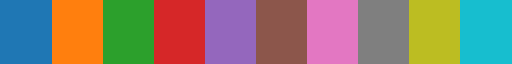

In [12]:
cm.tab10

In [13]:
cm.tab10(0)
#returns R,G,B,Alpha values

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [14]:
np.array(cm.tab10(0))[:3]

array([0.12156863, 0.46666667, 0.70588235])

In [15]:
np.array(cm.tab10(0))[:3]*255

array([ 31., 119., 180.])

In [16]:
x = np.array(cm.tab10(0))[:3]*255

In [17]:
#converting float data type into int
x.astype(int)

array([ 31, 119, 180])

In [18]:
tuple(x.astype(int))

(31, 119, 180)

In [19]:
########################################
#Creating a function for the above steps 
########################################

In [20]:
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [21]:
colors = []

In [22]:
#assigning one digit to each color: 
for i in range(10):
    colors.append(create_rgb(i))

In [23]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [24]:
#global variables 

n_markers = 10  #numbers 0-10
current_marker = 1  #color choice
marks_updated = False #markers updated after watershed

In [25]:
#Callback function 

def mouse_callback(event,x,y,param,flags): 
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        
        #marker tracking for watershed 
        cv2.circle(marker_image, (x,y), 10, (current_marker), -1)
        
        #display circles for user
        cv2.circle(road_copy, (x,y), 10, colors[current_marker], -1)
        marks_updated = True

In [26]:
#While true loop: 

cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    #show all windows
    cv2.imshow('Watershed Segments',segments)
    cv2.imshow('Road Image', road_copy)
    
    #close all windows
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
    #Clear all colors on pressing c key 
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    elif k > 0 and chr(k).isdigit():
        
        current_marker = int(chr(k))
        
        # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:
        
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()
    
    